download data set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
us_companies = pd.read_csv("us-companies.csv", sep=";")  

In [3]:
us_shareprices_daily = pd.read_csv("us-shareprices-daily.csv", sep=";")

In [4]:
us_companies.head()

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,17162642,NaN,NaN,NaN,NaN,NaN,NaN,us,1913577.0,USD
1,NaN,17429327,NaN,NaN,NaN,NaN,NaN,NaN,us,1894951.0,USD
2,NaN,17590527,NaN,NaN,NaN,NaN,NaN,NaN,us,1847355.0,USD
3,NaN,17590533,NaN,NaN,NaN,NaN,NaN,NaN,us,1856161.0,USD
4,NaN,17596599,NaN,NaN,NaN,NaN,NaN,NaN,us,1862463.0,USD


In [5]:
us_companies.tail()

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
6079,ZWS,17663788,Zurn Elkay Water Solutions Corporation,100001.0,US98983L1089,12.0,2700.0,Zurn Elkay Water Solutions Corporation designs...,us,1439288.0,USD
6080,ZY,1243193,Zymergen Inc.,106002.0,US98985X1000,12.0,758.0,Zymergen is a biofacturing company using biolo...,us,1645842.0,USD
6081,ZYME,17663790,Zymeworks Inc.,106002.0,CA98985W1023,12.0,291.0,"Zymeworks Inc., a clinical-stage biopharmaceut...",us,1403752.0,USD
6082,ZYNE,901704,"Zynerba Pharmaceuticals, Inc.",106002.0,US98986X1090,12.0,25.0,Zynerba Pharmaceuticals Inc together with its ...,us,1621443.0,USD
6083,ZYXI,171401,ZYNEX INC,106004.0,US98986M1036,12.0,768.0,"Zynex, Inc. engages in the design, manufacture...",us,846475.0,USD


In [6]:
us_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ticker                         6008 non-null   object 
 1   SimFinId                       6084 non-null   int64  
 2   Company Name                   6010 non-null   object 
 3   IndustryId                     5798 non-null   float64
 4   ISIN                           5000 non-null   object 
 5   End of financial year (month)  6011 non-null   float64
 6   Number Employees               5331 non-null   float64
 7   Business Summary               5772 non-null   object 
 8   Market                         6084 non-null   object 
 9   CIK                            6072 non-null   float64
 10  Main Currency                  6084 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 523.0+ KB


In [7]:
# Keep only the required columns
us_companies = us_companies[["Ticker", "SimFinId", "Company Name", "Number Employees"]]

In [8]:
us_companies.head()

,Ticker,SimFinId,Company Name,Number Employees
0,NaN,17162642,NaN,NaN
1,NaN,17429327,NaN,NaN
2,NaN,17590527,NaN,NaN
3,NaN,17590533,NaN,NaN
4,NaN,17596599,NaN,NaN


In [9]:
us_shareprices_daily.head()


,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112,NaN,317515869.0
1,A,45846,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875,NaN,317515869.0
2,A,45846,2019-04-08,81.57,81.71,80.58,81.69,78.46,783350,NaN,317515869.0
3,A,45846,2019-04-09,81.56,81.72,81.27,81.42,78.20,1254742,NaN,317515869.0
4,A,45846,2019-04-10,81.45,82.24,81.45,81.68,78.45,982886,NaN,317515869.0


In [10]:
us_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticker            6008 non-null   object 
 1   SimFinId          6084 non-null   int64  
 2   Company Name      6010 non-null   object 
 3   Number Employees  5331 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 190.3+ KB


In [11]:
merged_df = pd.merge(us_companies, us_shareprices_daily, on=["Ticker", "SimFinId"], how="outer")

In [12]:
merged_df.head()

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112.0,NaN,317515869.0
1,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875.0,NaN,317515869.0
2,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-08,81.57,81.71,80.58,81.69,78.46,783350.0,NaN,317515869.0
3,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-09,81.56,81.72,81.27,81.42,78.20,1254742.0,NaN,317515869.0
4,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-10,81.45,82.24,81.45,81.68,78.45,982886.0,NaN,317515869.0


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787931 entries, 0 to 5787930
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ticker              object 
 1   SimFinId            int64  
 2   Company Name        object 
 3   Number Employees    float64
 4   Date                object 
 5   Open                float64
 6   High                float64
 7   Low                 float64
 8   Close               float64
 9   Adj. Close          float64
 10  Volume              float64
 11  Dividend            float64
 12  Shares Outstanding  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 574.1+ MB


In [14]:
merged_df.tail()

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
5787926,NaN,18126561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5787927,NaN,18134899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5787928,NaN,18134901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5787929,NaN,18155169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5787930,NaN,18193990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
merged_df.isnull()

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787926,True,False,True,True,True,True,True,True,True,True,True,True,True
5787927,True,False,True,True,True,True,True,True,True,True,True,True,True
5787928,True,False,True,True,True,True,True,True,True,True,True,True,True
5787929,True,False,True,True,True,True,True,True,True,True,True,True,True


In [16]:
# Drop rows where there are more than 6 NaN values
filtered_df = merged_df.dropna(thresh=len(merged_df.columns) - 6)

In [17]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5787411 entries, 0 to 5787854
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Ticker              object 
 1   SimFinId            int64  
 2   Company Name        object 
 3   Number Employees    float64
 4   Date                object 
 5   Open                float64
 6   High                float64
 7   Low                 float64
 8   Close               float64
 9   Adj. Close          float64
 10  Volume              float64
 11  Dividend            float64
 12  Shares Outstanding  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 618.2+ MB


In [18]:
# Group by 'Ticker' and count the number of rows for each
ticker_counts = filtered_df.groupby("Ticker").size().reset_index(name="Count")

# Sort by count in descending order
ticker_counts = ticker_counts.sort_values(by="Count", ascending=False)

ticker_counts

,Ticker,Count
0,A,1240
3143,MEDP,1240
3205,MKSI,1240
3207,MKTX,1240
3209,MLAB,1240
...,...,...
5376,WIN,1
356,APOP,1
4097,QTNT,1
417,ARRS,1


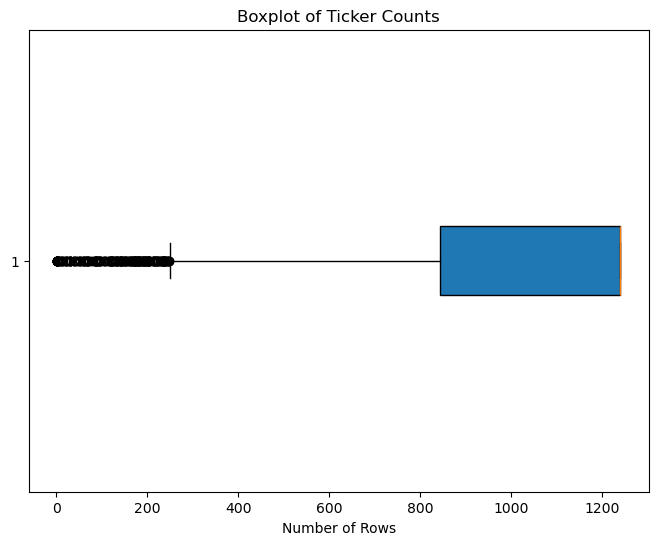

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Ticker' and count the number of rows for each
ticker_counts = filtered_df.groupby("Ticker").size().reset_index(name="Count")

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(ticker_counts["Count"], vert=False, patch_artist=True)

# Labels and title
plt.xlabel("Number of Rows")
plt.title("Boxplot of Ticker Counts")

# Show the plot
plt.show()

In [20]:
import pandas as pd

# Ensure filtered_df exists in memory before running this
if 'filtered_df' in locals() or 'filtered_df' in globals():
    # Recompute ticker counts
    ticker_counts = filtered_df.groupby("Ticker").size().reset_index(name="Count")

    # Get tickers with at least 200 rows
    valid_tickers = ticker_counts[ticker_counts["Count"] >= 200]["Ticker"]

    # Filter the original DataFrame to keep only valid tickers
    filtered_df = filtered_df[filtered_df["Ticker"].isin(valid_tickers)]


In [21]:
filtered_df

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112.0,NaN,317515869.0
1,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-05,81.19,81.92,81.05,81.47,78.25,1502875.0,NaN,317515869.0
2,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-08,81.57,81.71,80.58,81.69,78.46,783350.0,NaN,317515869.0
3,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-09,81.56,81.72,81.27,81.42,78.20,1254742.0,NaN,317515869.0
4,A,45846,AGILENT TECHNOLOGIES INC,16400.0,2019-04-10,81.45,82.24,81.45,81.68,78.45,982886.0,NaN,317515869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787850,ZYXI,171401,ZYNEX INC,768.0,2024-03-01,12.05,13.43,12.00,12.30,12.30,1216112.0,NaN,32170182.0
5787851,ZYXI,171401,ZYNEX INC,768.0,2024-03-04,12.26,12.98,12.26,12.57,12.57,349550.0,NaN,32170182.0
5787852,ZYXI,171401,ZYNEX INC,768.0,2024-03-05,12.61,12.96,12.52,12.87,12.87,186852.0,NaN,32170182.0
5787853,ZYXI,171401,ZYNEX INC,768.0,2024-03-06,13.03,13.03,12.45,12.73,12.73,147222.0,NaN,32170182.0


In [22]:
null_counts = filtered_df.isnull().sum()
null_counts

Ticker                      0
SimFinId                    0
Company Name                0
Number Employees       296830
Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj. Close                  0
Volume                      0
Dividend              5735881
Shares Outstanding     515832
dtype: int64

In [23]:
filtered_df["Dividend"] = filtered_df["Dividend"].fillna(0)

In [24]:
null_counts = filtered_df.isnull().sum()
null_counts

Ticker                     0
SimFinId                   0
Company Name               0
Number Employees      296830
Date                       0
Open                       0
High                       0
Low                        0
Close                      0
Adj. Close                 0
Volume                     0
Dividend                   0
Shares Outstanding    515832
dtype: int64

In [25]:
filtered_GOOG = filtered_df[filtered_df["Ticker"] == "GOOG"]
filtered_GOOG

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
2267456,GOOG,18,Alphabet (Google),135301.0,2019-04-04,60.30,60.78,60.21,60.75,60.53,19014940.0,0.0,1.389564e+10
2267457,GOOG,18,Alphabet (Google),135301.0,2019-04-05,60.75,60.81,60.25,60.36,60.14,18143040.0,0.0,1.389564e+10
2267458,GOOG,18,Alphabet (Google),135301.0,2019-04-08,60.39,60.43,59.99,60.19,59.98,17207260.0,0.0,1.389564e+10
2267459,GOOG,18,Alphabet (Google),135301.0,2019-04-09,59.80,60.11,59.65,59.86,59.65,17527620.0,0.0,1.389564e+10
2267460,GOOG,18,Alphabet (Google),135301.0,2019-04-10,60.03,60.19,59.82,60.11,59.89,14492860.0,0.0,1.389564e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268691,GOOG,18,Alphabet (Google),135301.0,2024-03-01,139.61,140.00,137.97,138.08,137.58,28551525.0,0.0,1.258100e+10
2268692,GOOG,18,Alphabet (Google),135301.0,2024-03-04,136.54,136.63,132.86,134.20,133.72,43571510.0,0.0,1.258100e+10
2268693,GOOG,18,Alphabet (Google),135301.0,2024-03-05,132.74,134.02,131.55,133.78,133.30,28447550.0,0.0,1.258100e+10
2268694,GOOG,18,Alphabet (Google),135301.0,2024-03-06,134.24,134.74,131.95,132.56,132.08,23175200.0,0.0,1.258100e+10


In [26]:
filtered_GOOG = filtered_df[filtered_df["Ticker"] == "GOOG"]
filtered_GOOG

,Ticker,SimFinId,Company Name,Number Employees,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
2267456,GOOG,18,Alphabet (Google),135301.0,2019-04-04,60.30,60.78,60.21,60.75,60.53,19014940.0,0.0,1.389564e+10
2267457,GOOG,18,Alphabet (Google),135301.0,2019-04-05,60.75,60.81,60.25,60.36,60.14,18143040.0,0.0,1.389564e+10
2267458,GOOG,18,Alphabet (Google),135301.0,2019-04-08,60.39,60.43,59.99,60.19,59.98,17207260.0,0.0,1.389564e+10
2267459,GOOG,18,Alphabet (Google),135301.0,2019-04-09,59.80,60.11,59.65,59.86,59.65,17527620.0,0.0,1.389564e+10
2267460,GOOG,18,Alphabet (Google),135301.0,2019-04-10,60.03,60.19,59.82,60.11,59.89,14492860.0,0.0,1.389564e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268691,GOOG,18,Alphabet (Google),135301.0,2024-03-01,139.61,140.00,137.97,138.08,137.58,28551525.0,0.0,1.258100e+10
2268692,GOOG,18,Alphabet (Google),135301.0,2024-03-04,136.54,136.63,132.86,134.20,133.72,43571510.0,0.0,1.258100e+10
2268693,GOOG,18,Alphabet (Google),135301.0,2024-03-05,132.74,134.02,131.55,133.78,133.30,28447550.0,0.0,1.258100e+10
2268694,GOOG,18,Alphabet (Google),135301.0,2024-03-06,134.24,134.74,131.95,132.56,132.08,23175200.0,0.0,1.258100e+10


In [27]:
goog_df = filtered_GOOG[['Date', 'Close']].copy()

# Ensure Date column is in datetime format and sorted
goog_df['Date'] = pd.to_datetime(goog_df['Date'])
goog_df = goog_df.sort_values(by='Date')

# Creating lagged features correctly
goog_df['Close_t-3'] = goog_df['Close'].shift(3)
goog_df['Close_t-2'] = goog_df['Close'].shift(2)
goog_df['Close_t-1'] = goog_df['Close'].shift(1)

# Correctly setting the target (1 = rise, 0 = fall)
goog_df['Target'] = (goog_df['Close'] > goog_df['Close'].shift(1)).astype(int)

# Drop rows with NaN values due to shifting
goog_ml_df = goog_df.dropna().reset_index(drop=True)

goog_ml_df



,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target
0,2019-04-09,59.86,60.75,60.36,60.19,0
1,2019-04-10,60.11,60.36,60.19,59.86,1
2,2019-04-11,60.23,60.19,59.86,60.11,1
3,2019-04-12,60.89,59.86,60.11,60.23,1
4,2019-04-15,61.05,60.11,60.23,60.89,1
...,...,...,...,...,...,...
1232,2024-03-01,138.08,140.10,137.43,139.78,0
1233,2024-03-04,134.20,137.43,139.78,138.08,0
1234,2024-03-05,133.78,139.78,138.08,134.20,0
1235,2024-03-06,132.56,138.08,134.20,133.78,0


In [28]:
goog_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Close      1237 non-null   float64       
 2   Close_t-3  1237 non-null   float64       
 3   Close_t-2  1237 non-null   float64       
 4   Close_t-1  1237 non-null   float64       
 5   Target     1237 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 53.3 KB


## Model Training

In [29]:
# Load data
X = goog_ml_df.drop(['Date', 'Close', 'Target'], axis=1)
y = goog_ml_df['Target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [30]:
# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Fitting logistic regression model
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [32]:
# Check predicted probabilities
y_train_probs = classifier.predict_proba(X_train)[:, 1]  # Get probabilities for class 1
y_test_probs = classifier.predict_proba(X_test)[:, 1] 

# Print basic statistics
import numpy as np
print("Min probability:", np.min(y_train_probs))
print("Max probability:", np.max(y_train_probs))
print("Mean probability:", np.mean(y_train_probs))

print("Min probability (Test):", np.min(y_test_probs))
print("Max probability (Test):", np.max(y_test_probs))
print("Mean probability (Test):", np.mean(y_test_probs))


Min probability: 0.4858917008362628
Max probability: 0.5836080873246619
Mean probability: 0.5421965683581579
Min probability (Test): 0.5034712592271767
Max probability (Test): 0.5826022725167044
Mean probability (Test): 0.5441822890308624


In [33]:
# Adjust the classification threshold (Try 0.55 or 0.6)
threshold = 0.55  # Experiment with 0.55 or 0.6
y_predict_train = (y_train_probs >= threshold).astype(int)
y_predict_test = (y_test_probs >= threshold).astype(int)

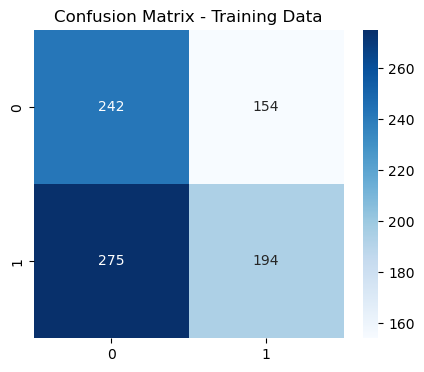

In [34]:
# Training Data - Confusion Matrix
cm_train = confusion_matrix(y_train, y_predict_train)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Training Data")
plt.show()

In [35]:
# Training Data - Classification Report
print("Training Data Classification Report:")
print(classification_report(y_train, y_predict_train))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.61      0.53       396
           1       0.56      0.41      0.47       469

    accuracy                           0.50       865
   macro avg       0.51      0.51      0.50       865
weighted avg       0.52      0.50      0.50       865



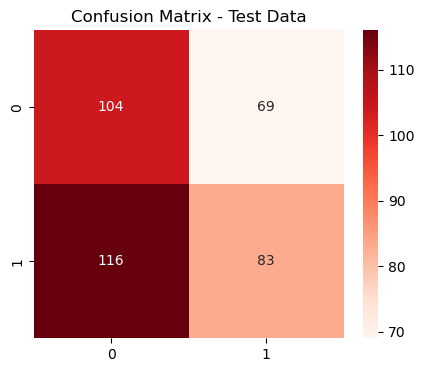

In [36]:
# Test Data - Confusion Matrix
cm_test = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - Test Data")
plt.show()

In [37]:
# Test Data - Classification Report
print("Test Data Classification Report:")
print(classification_report(y_test, y_predict_test))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53       173
           1       0.55      0.42      0.47       199

    accuracy                           0.50       372
   macro avg       0.51      0.51      0.50       372
weighted avg       0.51      0.50      0.50       372



## Model Deployment

In [38]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
# Generate classification report and confusion matrix
classification_rep = classification_report(y_test, y_predict_test, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_predict_test)

In [40]:
# Store model data
model_data = {
    "model": classifier,  # Trained model
    "y_test": y_test,  # Actual test labels
    "y_predict_test": y_predict_test,  # Predicted test labels
    "classification_report": classification_rep,  # Performance report
    "confusion_matrix": conf_matrix  # Confusion matrix
}

In [41]:
# Save the trained model
model_filename = "stock_predictor.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(classifier, file)

In [42]:
# Save the scaler for preprocessing new data
scaler_filename = "scaler.pkl"
with open(scaler_filename, "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


## ML Data Frames for Other Stocks

In [43]:
import pandas as pd

def prepare_ml_data(ticker):
    """
    Prepares machine learning data for the given stock ticker.
    
    Parameters:
    ticker (str): Stock ticker symbol to filter and process.
    
    Returns:
    pd.DataFrame: Processed DataFrame ready for machine learning.
    """
    # Filter for the given stock ticker
    stock_df = filtered_df[filtered_df["Ticker"] == ticker][['Date', 'Close']].copy()
    
    # Ensure Date column is in datetime format and sort by date
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df = stock_df.sort_values(by='Date')
    
    # Creating lagged features
    stock_df['Close_t-3'] = stock_df['Close'].shift(3)
    stock_df['Close_t-2'] = stock_df['Close'].shift(2)
    stock_df['Close_t-1'] = stock_df['Close'].shift(1)
    
    # Setting the target variable (1 = rise, 0 = fall)
    stock_df['Target'] = (stock_df['Close'] > stock_df['Close'].shift(1)).astype(int)
    
    # Drop rows with NaN values due to shifting
    stock_ml_df = stock_df.dropna().reset_index(drop=True)
    
    return stock_ml_df


## ML Model Deployment Function

In [44]:
def predict_stock_movement(stock_df):
    """
    Predicts stock movement using a pre-trained logistic regression model.
    
    Parameters:
    stock_df (pd.DataFrame): DataFrame containing the processed stock data with lagged features.
    
    Returns:
    pd.DataFrame: The input DataFrame with an additional column for predicted stock movement.
    """
    # Load the scaler and model
    scaler_path = "scaler.pkl"
    model_path = "stock_predictor.pkl"
    
    with open(scaler_path, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    
    with open(model_path, 'rb') as model_file:
        stock_predictor = pickle.load(model_file)
    
    # Select relevant features
    X_stock = stock_df[['Close_t-3', 'Close_t-2', 'Close_t-1']]
    
    # Scale the features
    X_stock_scaled = scaler.transform(X_stock)
    
    # Make predictions
    stock_df['Predicted_Target'] = stock_predictor.predict(X_stock_scaled)
    
    return stock_df


In [ ]:
import pickle

model_path = "stock_predictor.pkl"

with open(model_path, 'rb') as model_file:
    stock_predictor = pickle.load(model_file)

print(type(stock_predictor)) 


<class 'sklearn.linear_model._logistic.LogisticRegression'>


## Amazon Stock

In [46]:
amzn_ml_df = prepare_ml_data("AMZN")

In [47]:
amzn_ml_df.head()

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target
0,2019-04-09,91.79,90.94,91.86,92.49,0
1,2019-04-10,92.37,91.86,92.49,91.79,1
2,2019-04-11,92.20,92.49,91.79,92.37,0
3,2019-04-12,92.15,91.79,92.37,92.20,0
4,2019-04-15,92.24,92.37,92.20,92.15,1


In [48]:
amzn_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Close      1237 non-null   float64       
 2   Close_t-3  1237 non-null   float64       
 3   Close_t-2  1237 non-null   float64       
 4   Close_t-1  1237 non-null   float64       
 5   Target     1237 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 53.3 KB


In [61]:
predict_stock_movement(amzn_ml_df)
amzn_ml_df

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target,Predicted_Target
0,2019-04-09,91.79,90.94,91.86,92.49,0,1
1,2019-04-10,92.37,91.86,92.49,91.79,1,1
2,2019-04-11,92.20,92.49,91.79,92.37,0,1
3,2019-04-12,92.15,91.79,92.37,92.20,0,1
4,2019-04-15,92.24,92.37,92.20,92.15,1,1
...,...,...,...,...,...,...,...
1232,2024-03-01,178.22,173.54,173.16,176.76,1,0
1233,2024-03-04,177.58,173.16,176.76,178.22,0,1
1234,2024-03-05,174.12,176.76,178.22,177.58,0,0
1235,2024-03-06,173.51,178.22,177.58,174.12,0,0


## Apple Stock Table

In [50]:
aapl_ml_df = prepare_ml_data("AAPL")

In [51]:
aapl_ml_df.head()

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target
0,2019-04-09,49.88,48.92,49.25,50.02,0
1,2019-04-10,50.16,49.25,50.02,49.88,1
2,2019-04-11,49.74,50.02,49.88,50.16,0
3,2019-04-12,49.72,49.88,50.16,49.74,0
4,2019-04-15,49.81,50.16,49.74,49.72,1


In [52]:
aapl_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Close      1237 non-null   float64       
 2   Close_t-3  1237 non-null   float64       
 3   Close_t-2  1237 non-null   float64       
 4   Close_t-1  1237 non-null   float64       
 5   Target     1237 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 53.3 KB


In [62]:
predict_stock_movement(aapl_ml_df)
aapl_ml_df

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target,Predicted_Target
0,2019-04-09,49.88,48.92,49.25,50.02,0,1
1,2019-04-10,50.16,49.25,50.02,49.88,1,1
2,2019-04-11,49.74,50.02,49.88,50.16,0,1
3,2019-04-12,49.72,49.88,50.16,49.74,0,1
4,2019-04-15,49.81,50.16,49.74,49.72,1,1
...,...,...,...,...,...,...,...
1232,2024-03-01,179.66,182.63,181.42,180.75,0,0
1233,2024-03-04,175.10,181.42,180.75,179.66,0,0
1234,2024-03-05,170.12,180.75,179.66,175.10,0,0
1235,2024-03-06,169.12,179.66,175.10,170.12,0,0


## Netflix Stock Table

In [53]:
nflx_ml_df = prepare_ml_data("NFLX")

In [54]:
nflx_ml_df.head()

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target
0,2019-04-09,364.71,367.88,365.49,361.41,1
1,2019-04-10,363.92,365.49,361.41,364.71,0
2,2019-04-11,367.65,361.41,364.71,363.92,1
3,2019-04-12,351.14,364.71,363.92,367.65,0
4,2019-04-15,348.87,363.92,367.65,351.14,0


In [55]:
nflx_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Close      1237 non-null   float64       
 2   Close_t-3  1237 non-null   float64       
 3   Close_t-2  1237 non-null   float64       
 4   Close_t-1  1237 non-null   float64       
 5   Target     1237 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 53.3 KB


In [63]:
predict_stock_movement(nflx_ml_df)
nflx_ml_df

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target,Predicted_Target
0,2019-04-09,364.71,367.88,365.49,361.41,1,0
1,2019-04-10,363.92,365.49,361.41,364.71,0,0
2,2019-04-11,367.65,361.41,364.71,363.92,1,0
3,2019-04-12,351.14,364.71,363.92,367.65,0,0
4,2019-04-15,348.87,363.92,367.65,351.14,0,0
...,...,...,...,...,...,...,...
1232,2024-03-01,619.34,601.67,596.48,602.92,1,0
1233,2024-03-04,615.83,596.48,602.92,619.34,0,0
1234,2024-03-05,598.50,602.92,619.34,615.83,0,0
1235,2024-03-06,597.69,619.34,615.83,598.50,0,0


## Microsoft Stock Table

In [56]:
msft_ml_df = prepare_ml_data("MSFT")

In [57]:
msft_ml_df.head()

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target
0,2019-04-09,119.28,119.36,119.89,119.93,0
1,2019-04-10,120.19,119.89,119.93,119.28,1
2,2019-04-11,120.33,119.93,119.28,120.19,1
3,2019-04-12,120.95,119.28,120.19,120.33,1
4,2019-04-15,121.05,120.19,120.33,120.95,1


In [58]:
msft_ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1237 non-null   datetime64[ns]
 1   Close      1237 non-null   float64       
 2   Close_t-3  1237 non-null   float64       
 3   Close_t-2  1237 non-null   float64       
 4   Close_t-1  1237 non-null   float64       
 5   Target     1237 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 53.3 KB


In [64]:
predict_stock_movement(msft_ml_df)
msft_ml_df

,Date,Close,Close_t-3,Close_t-2,Close_t-1,Target,Predicted_Target
0,2019-04-09,119.28,119.36,119.89,119.93,0,1
1,2019-04-10,120.19,119.89,119.93,119.28,1,1
2,2019-04-11,120.33,119.93,119.28,120.19,1,1
3,2019-04-12,120.95,119.28,120.19,120.33,1,1
4,2019-04-15,121.05,120.19,120.33,120.95,1,1
...,...,...,...,...,...,...,...
1232,2024-03-01,415.50,407.48,407.72,413.64,1,0
1233,2024-03-04,414.92,407.72,413.64,415.50,0,0
1234,2024-03-05,402.65,413.64,415.50,414.92,0,0
1235,2024-03-06,402.09,415.50,414.92,402.65,0,0
